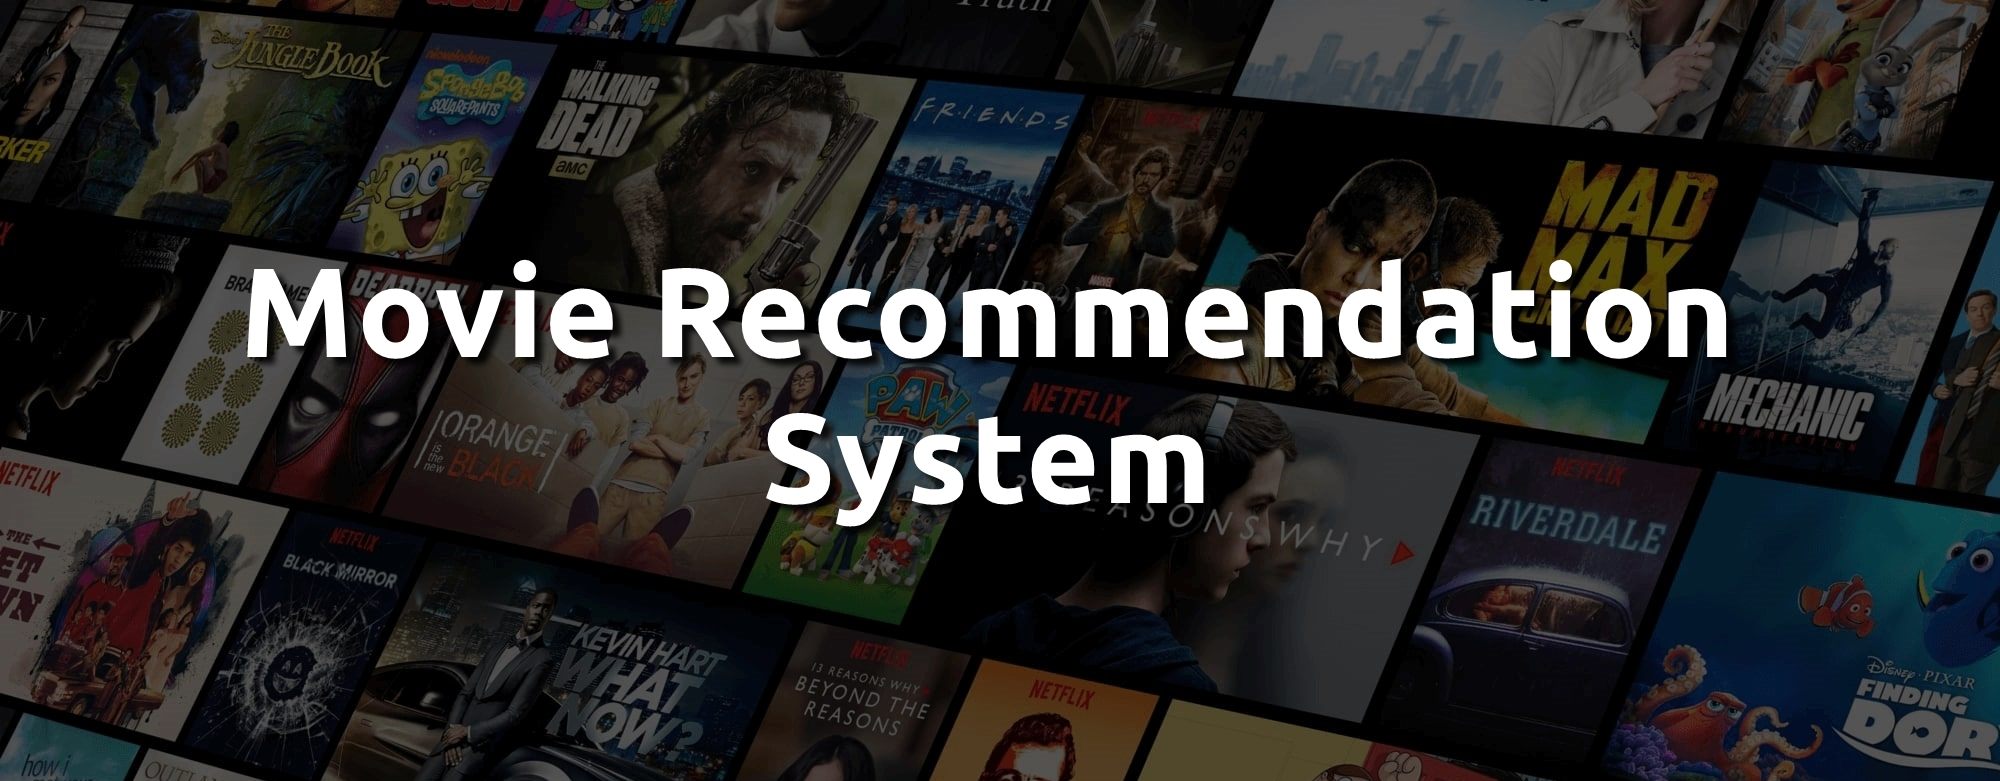

In [37]:
from IPython.display import Image,display
display(Image(filename ='D:\\Picture in data\\icon\\Deshbord\\132905471-3ef27af4-ecc6-44bf-a47c-5ccf2250410c.jpg'))

In [3]:
import pandas as pd 
import numpy as np

In [4]:
movies = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
movies. head()                     

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
data = rating.pivot(index="movieId", columns="userId", values="rating")

In [7]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum().head(5)

userId
1    9492
2    9695
3    9685
4    9508
5    9680
dtype: int64

In [9]:
data.fillna(0,inplace=True)

In [10]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# removing noise from dataset

In [12]:
no_user_voted = rating.groupby('movieId')['rating'].count()
no_movie_voted = rating.groupby('userId')['rating'].count()

In [13]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

## Visualization Imports

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\HP\AppData\Local\Temp\ipykernel_19892\4096230431.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(no_user_voted.index,no_user_voted,cmap='viridis')


Text(0, 0.5, 'no of user voted')

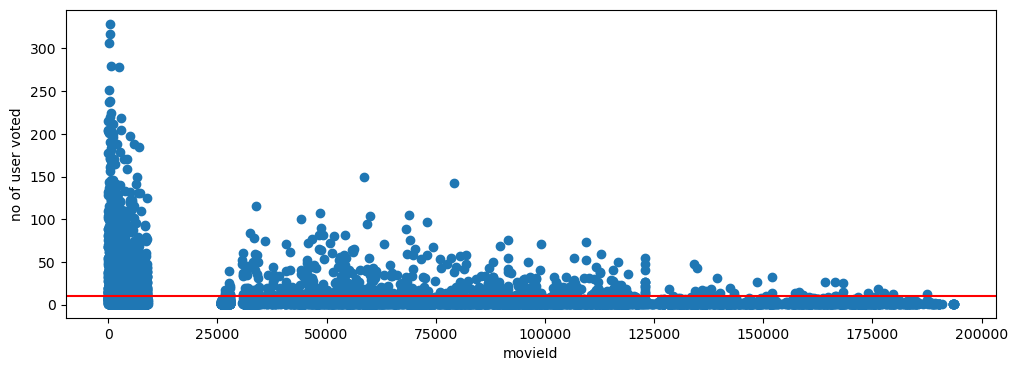

In [15]:
fig= plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
plt.scatter(no_user_voted.index,no_user_voted,cmap='viridis')
plt.axhline(y=10,color='red')
plt.xlabel('movieId')
plt.ylabel('no of user voted')

In [16]:
# Improved Naming:
df = data.loc[no_user_voted[no_user_voted > 10].index, :]

In [17]:
df.shape

(2121, 610)

C:\Users\HP\AppData\Local\Temp\ipykernel_19892\872438397.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(no_movie_voted.index,no_movie_voted,cmap='viridis')


Text(0, 0.5, 'No of user Voted')

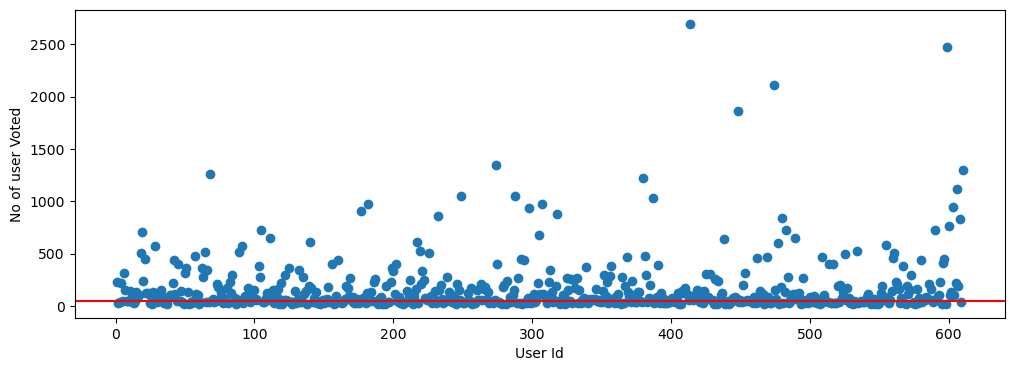

In [18]:
fig= plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
plt.scatter(no_movie_voted.index,no_movie_voted,cmap='viridis')
plt.axhline(y=50,color = 'red')
plt.xlabel('User Id')
plt.ylabel('No of user Voted')

In [19]:
# Filtering with intersection for valid indices
df = data.loc[:,no_movie_voted[no_movie_voted > 50]. index]

In [20]:
df.shape

(9724, 378)

In [21]:
# How to wark sparse
sample = np.array([[1,0,0,0,0], [0,0,2,0,0], [0,0,4,0,0]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.8


In [22]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(df.values)
df.reset_index(inplace=True)

In [23]:
print(csr_data,)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (9694, 286)	4.5
  (9695, 31)	3.0
  (9695, 236)	4.0
  (9695, 365)	4.0
  (9696, 197)	3.5
  (9697, 129)	4.5
  (9698, 317)	4.0
  (9699, 197)	4.5
  (9702, 115)	4.0
  (9702, 155)	3.5
  (9703, 197)	2.5
  (9704, 127)	1.0
  (9705, 286)	2.5
  (9706, 31)	3.5
  (9713, 115)	4.5
  (9714, 115)	3.5
  (9715, 115)	3.0
  (9716, 115)	4.0
  (9717, 115)	4.0
  (9718, 115)	3.5
  (9719, 115)	4.0
  (9720, 115)	3.5
  (9721, 115)	3.5
  (9722, 115)	3.5
  (9723, 205)	4.0


In [24]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
 def get_recommendation(movie_name):
    # Search for the movie
    movie = movies[movies['title'].str.contains(movie_name, case=False, na=False)]
    
    if movie.empty:
        return "Movie not found..."
    
    # Get the index of the movie in the dataset
    movie_id = movie.iloc[0]['movieId']
    try:
        movie_idx = df[df['movieId'] == movie_id].index[0]
    except IndexError:
        return "Movie not found in dataset..."

    # Find similar movies using k-NN
    distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
    
    # Get recommended movies
    recommended_movies = [
        {'Title': movies[movies['movieId'] == df.iloc[idx]['movieId']].iloc[0]['title'], 
         'Distance': dist}
        for idx, dist in zip(indices.squeeze()[1:], distances.squeeze()[1:])  # Skip the first result (itself)
    ]
    
    return pd.DataFrame(recommended_movies, index=range(1, len(recommended_movies) + 1))

In [27]:
get_recommendation("Toy Story")

,Title,Distance
1,Jurassic Park (1993),0.334884
2,Forrest Gump (1994),0.356542
3,Toy Story 2 (1999),0.371637
4,Star Wars: Episode IV - A New Hope (1977),0.380789
5,Shrek (2001),0.381472
6,Apollo 13 (1995),0.384633
7,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
8,Pulp Fiction (1994),0.398293
9,"Lion King, The (1994)",0.398578
10,Groundhog Day (1993),0.399495


In [28]:
import gradio as gr

In [29]:
def recommend_movies(movie_name):
    df = get_recommendation(movie_name)
    if isinstance(df, pd.DataFrame):
        return df.to_string(index=False)
    else:
        return df
app = gr.Interface(
    fn = recommend_movies, 
    inputs = "text",
    outputs = "text", 
    title = "Movie Recommendation System",
    description = "Enter a movie name to get a list of recommended movies"
)

app.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C:\Users\HP\AppData\Local\Temp\ipykernel_19892\1221384242.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie = movies[movies['title'].str.contains(movie_name, case=False, na=False)]
